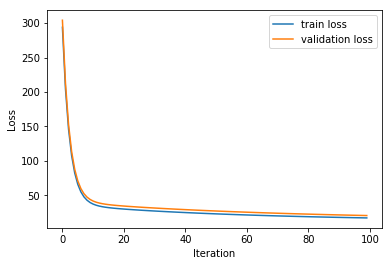

In [2]:
from sklearn import datasets as ds  
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

def Loss(X,y,w):
    temp = y - np.dot(X,w)
    loss = np.dot(temp.T,temp)/2
    return loss

def Grad(X,y,w):
    grad = np.dot(X.T,np.dot(X,w)-y)
    return grad

def iteration(x_train,x_validation,y_train,y_validation,w):
    itera = 100
    lr = 0.0001
    train_loss=[]
    validation_loss=[]
    for i in range(itera):
        loss_t=Loss(x_train,y_train,w)
        tx,ty=x_train.shape
        lt=loss_t[0,0]/tx
        train_loss.append(lt)
        loss_v=Loss(x_validation,y_validation,w)
        vx,vy=x_validation.shape
        lv=loss_v[0,0]/vx
        validation_loss.append(lv)
        w=w-lr*Grad(x_train,y_train,w)
    return w,train_loss,validation_loss
 
if __name__ == '__main__':
    x_train, y_train = ds.load_svmlight_file('E:/test/test.txt')
    x_train = x_train.toarray()
    yl=len(y_train)
    y_train=y_train.reshape(yl,1)
    n_sample,n_feature=x_train.shape
    x_train = np.concatenate([x_train, np.ones(shape=[506, 1], dtype=np.float32)], axis=1)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
    n_sample,n_feature=x_train.shape
    w0=np.zeros(shape=(n_feature,1))
    w,train_loss,validation_loss=iteration(x_train, x_validation, y_train, y_validation,w0)
    plt.plot(train_loss, label='train loss')
    plt.plot(validation_loss, label='validation loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    